In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from textblob import TextBlob
import re

In [ ]:
Kisan = pd.read_csv("/content/Kisan Call center Queries.csv")

In [ ]:
Kisan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178939 entries, 0 to 178938
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   questions          178939 non-null  object
 1   answers            178816 non-null  object
 2   cleaned_questions  178939 non-null  object
dtypes: object(3)
memory usage: 4.1+ MB


In [ ]:
def Clean_text(text):
  if isinstance(text,str):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]',' ',text)
    return text
    return " "

In [ ]:
# Function for sentiment analysis
Kisan['cleaned_questions'] = Kisan['questions'].apply(Clean_text)
def get_sentimnt(text):
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity
  if polarity > 0:
    return 'Postive +'
  elif polarity < 0:
    return 'Negative -'
  else:
    return 'Neutral'
  Kisan['Sentiment'] = Kisan['cleaned_questions'].apply(get_sentimnt)

In [ ]:
output_path = "/content/Kisan Call center Queries.csv"
Kisan.to_csv(output_path, index=False)

print(f"Sentiment analysis completed. Results saved to {output_path}")


Sentiment analysis completed. Results saved to /content/Kisan Call center Queries.csv


In [ ]:
# Build Linear  Regression

In [ ]:
# Assume we have numerical features for regression (dummy example)
# Generating numerical features from text length
Kisan['questions_length'] = Kisan['questions'].astype(str).apply(len)
Kisan = Kisan.dropna(subset=['questions_length'])

In [ ]:
# # Dummy target variable (replace with real target if available)
# Define features and target
X = Kisan[['questions_length']]
Y = np.random.rand(len(Kisan))*100

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

In [ ]:
print(f"Mean Squared Error : {mse}")
print(f"R-Squared Score : {r2}")

Mean Squared Error : 834.8012153752845
R-Squared Score : 1.0416716066385945e-06


In [ ]:
#  Build Logistic  Regression

In [ ]:
# Assume we have numerical features for regression (dummy example)
# Generating numerical features from text length
Kisan['questions_length'] = Kisan['questions'].astype(str).apply(len)
median_length = Kisan['questions_length'].median()
Kisan['target'] = (Kisan['questions_length'] > median_length).astype(int)
Kisan = Kisan.dropna(subset=['target'])

In [ ]:
X = Kisan[['questions_length']]
Y = Kisan['target']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model =  LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_test,Y_pred)
confusionmatrix = confusion_matrix(Y_test,Y_pred)

In [ ]:
print(f"Accuracy :{accuracy}")
print(f"Classification Report :\n",report)
print(f"Confusion Matrix :\n",confusionmatrix)

Accuracy :1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18880
           1       1.00      1.00      1.00     16908

    accuracy                           1.00     35788
   macro avg       1.00      1.00      1.00     35788
weighted avg       1.00      1.00      1.00     35788

Confusion Matrix :
 [[18880     0]
 [    0 16908]]


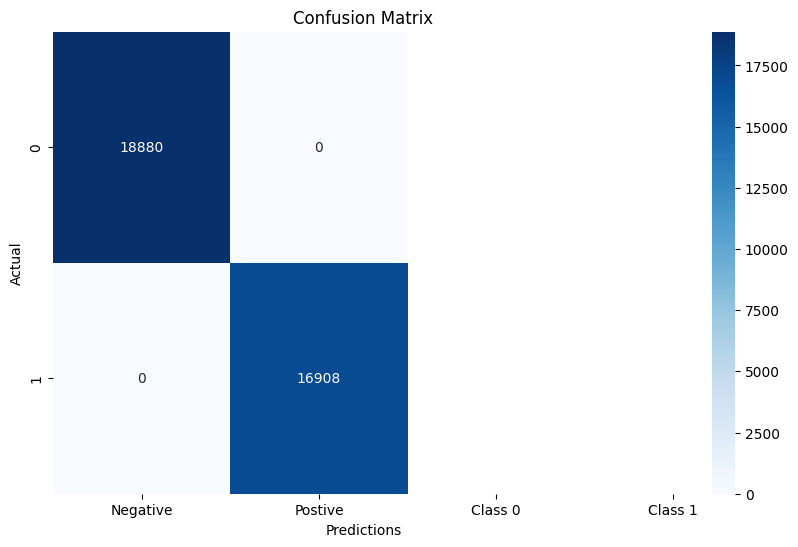

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Negative','Postive','Class 0','Class 1'])
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#  Decision Tree  with Sentiment as Dependent Variable

In [ ]:
# Assume we have numerical features for regression (dummy example)
# Generating numerical features from text length
Kisan['questions_length'] = Kisan['questions'].astype(str).apply(len)
Kisan = Kisan.dropna(subset=['questions_length'])

In [ ]:
# Function for sentiment analysis
Kisan['cleaned_questions'] = Kisan['questions'].apply(Clean_text)
def get_sentimnt(text):
  polarity = TextBlob(text).sentiment.polarity
  if polarity > 0:
    return 'Postive +'
  elif polarity < 0:
    return 'Negative -'
  else:
    return 'Neutral'
# Moved the assignment outside the function and changed to questions column
Kisan['Sentiment'] = Kisan['questions'].apply(get_sentimnt) # Changed to questions column

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(Kisan['questions']).toarray()
Y = Kisan['Sentiment']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_test,Y_pred)
confusionmatrix = confusion_matrix(Y_test,Y_pred)

In [ ]:
print(f"Accuracy :{accuracy}")
print(f"Classification Report :\n",report)
print(f"Confusion Matrix :\n",confusionmatrix)

In [ ]:
 #Random Forest, with Sentiment as Dependent Variable

In [ ]:
# Assume we have numerical features for regression (dummy example)
# Generating numerical features from text length
Kisan['questions_length'] = Kisan['questions'].astype(str).apply(len)
Kisan = Kisan.dropna(subset=['questions_length'])

In [ ]:
# Function for sentiment analysis
def get_sentimnt(text):
  polarity = TextBlob(text).sentiment.polarity
  if polarity > 0:
    return 'Postive +'
  elif polarity < 0:
    return 'Negative -'
  else:
    return 'Neutral'
# Moved the assignment outside the function and changed to questions column
Kisan['Sentiment'] = Kisan['questions'].apply(get_sentimnt) # Changed to questions column

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(Kisan['questions']).toarray()
Y = Kisan['Sentiment']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_test,Y_pred)

In [ ]:
print(f"Accuracy :{accuracy}")
print(f"Classification Report :\n",report)
print(f"Confusion Matrix :\n",confusionmatrix)

In [ ]:
# Gradient Boosting with Sentiment as Dependent Variable


In [ ]:
# Assume we have numerical features for regression (dummy example)
# Generating numerical features from text length
Kisan['questions_length'] = Kisan['questions'].astype(str).apply(len)
Kisan = Kisan.dropna(subset=['questions_length'])

In [ ]:
# Function for sentiment analysis
def get_sentimnt(text):
  polarity = TextBlob(text).sentiment.polarity
  if polarity > 0:
    return 'Postive +'
  elif polarity < 0:
    return 'Negative -'
  else:
    return 'Neutral'
# Moved the assignment outside the function and changed to questions column
Kisan['Sentiment'] = Kisan['questions'].apply(get_sentimnt) # Changed to questions column

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(Kisan['questions']).toarray()
Y = Kisan['Sentiment']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_test,Y_pred)

In [ ]:
print(f"Accuracy :{accuracy}\n")
print(f"Classification Report :\n",report)